<a href="https://colab.research.google.com/github/Sbhasathiti/Probability_Statistics/blob/main/Bhasathiti_Stats_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [1]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [2]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda')) #returns true if the data type is a floating point 

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda')) #returns false if data type is a floating point 

def plot(x):
    fig, ax = plt.subplots() #using the variable ax for single Axes
    im = ax.imshow(x, cmap = 'gray') #displays image as grayscale 
    ax.axis('off')
    fig.set_size_inches(5, 5) #width is 5 inches and height is 5 inches 
    plt.show()
    
def get_google_slide(url): 
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id #makes slideshow into pdf ? 

def get_slides(url):
    url = get_google_slide(url) #url is from google slides 
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500) #downloads images as a pdf 
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device) #copies a tensor 

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #indicates if CUDA is availible 

In [3]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()} #classifies images 

model = alexnet(weights='DEFAULT').to(device)
model.eval();

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [4]:
url = "https://docs.google.com/presentation/d/1pxQp9WQrW_dWLSTMzP94vgqIVGkUB-TzJpACoMEWMTU/edit#slide=id.p" #link to google slides data 

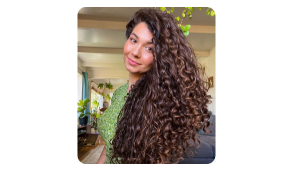

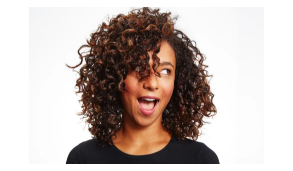

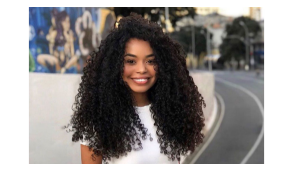

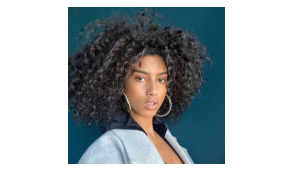

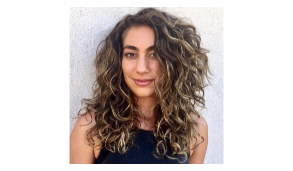

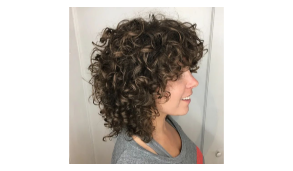

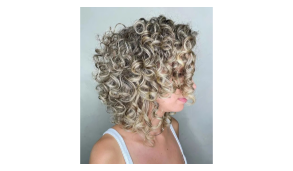

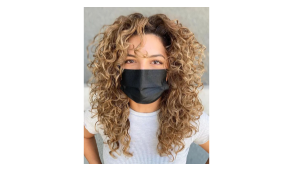

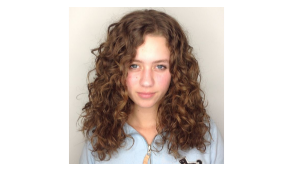

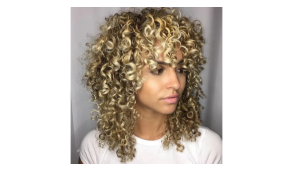

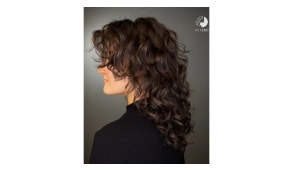

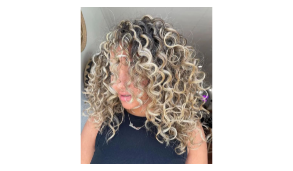

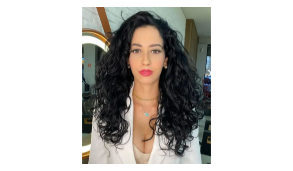

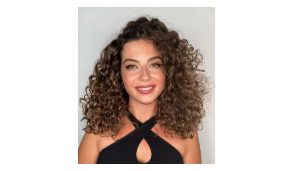

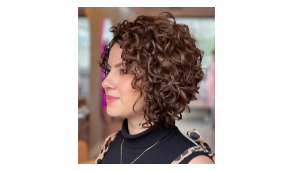

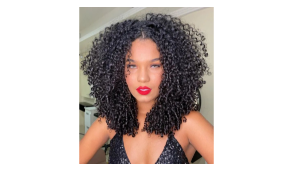

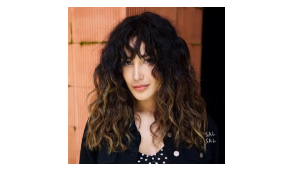

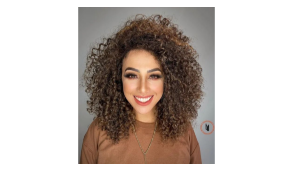

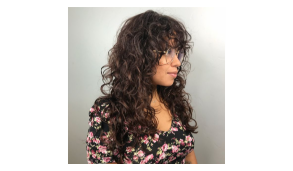

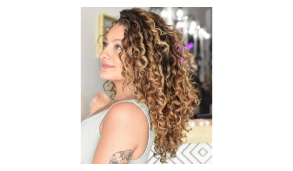

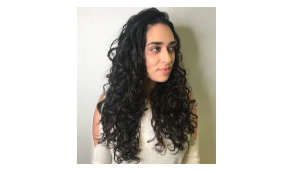

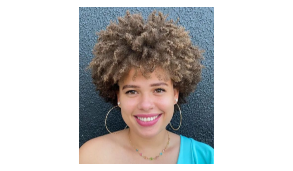

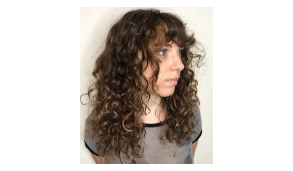

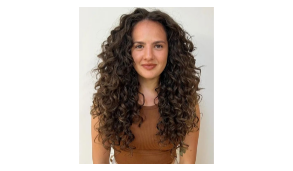

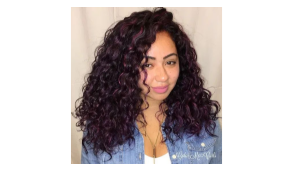

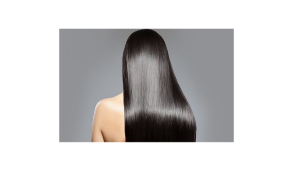

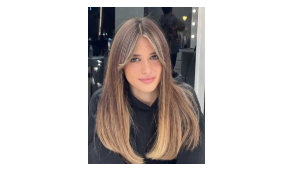

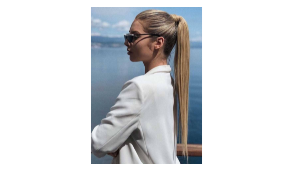

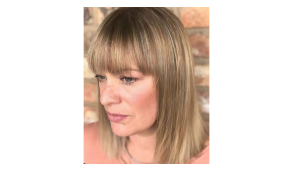

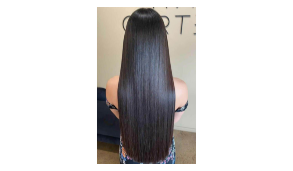

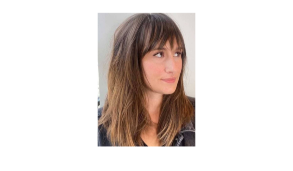

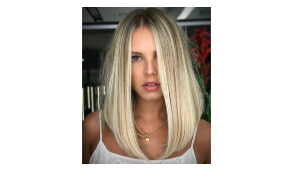

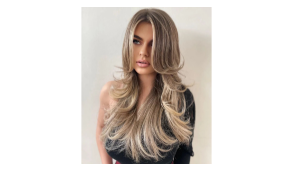

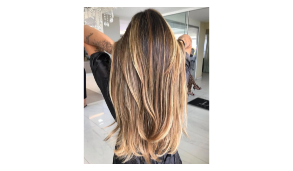

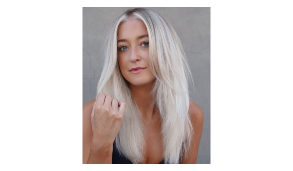

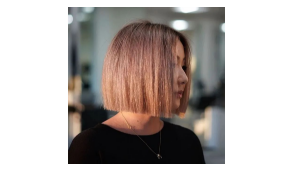

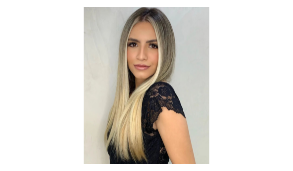

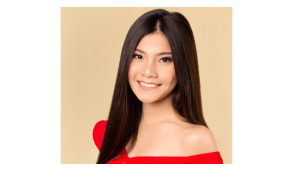

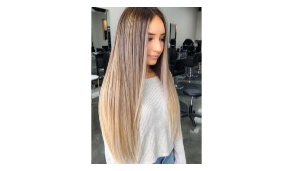

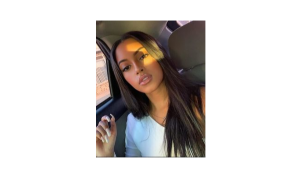

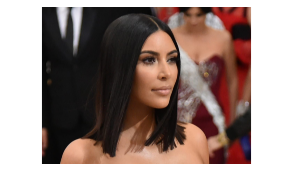

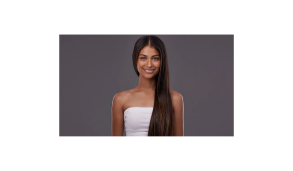

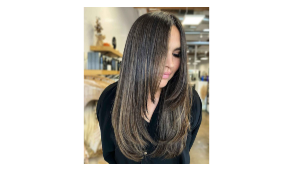

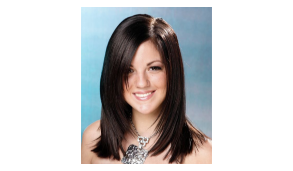

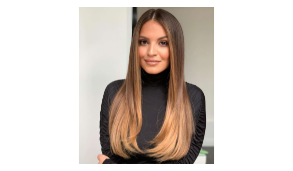

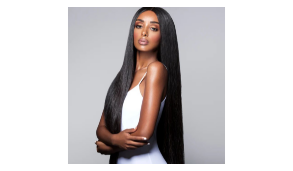

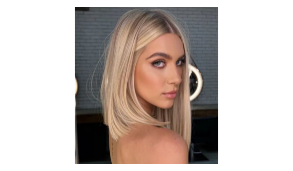

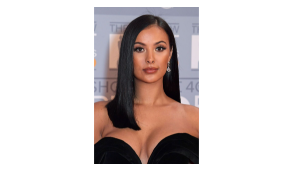

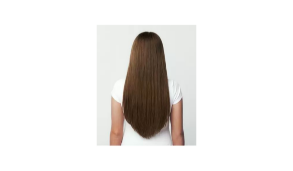

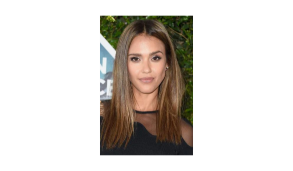

In [5]:
images = []

for image in get_slides(url): 

    plot(image)

    images.append(load(image)) #loads images from google slides 

images = torch.vstack(images) #stacks the tensors (images)

In [6]:
images.shape  #returns the dimensions of the images 

torch.Size([50, 3, 224, 224])

In [7]:
model(images) #returns the data from the images in an array 

tensor([[ 0.4821, -0.9549, -3.4115,  ...,  0.0156,  5.7718,  0.6942],
        [-1.2954, -1.9449, -4.6227,  ..., -1.8972,  3.2594,  4.7951],
        [-1.7656, -2.6070,  1.5301,  ..., -1.7203,  3.3962,  1.6268],
        ...,
        [-0.0665, -3.4288, -1.2401,  ..., -3.6443, -2.2521,  3.9718],
        [-0.3411, -0.3980, -3.8211,  ..., -0.4166,  1.2028,  4.4531],
        [ 4.1196, -0.5343, -3.0669,  ..., -0.2351,  1.7236,  1.0292]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [8]:
y = model(images) #sets data = to y 

In [9]:
y.shape 

torch.Size([50, 1000])

In [10]:
guesses = torch.argmax(y, 1).cpu().numpy() #Returns the indices of the maximum values of a tensor across a dimension. 

In [11]:
for i in list(guesses): #??? 
    print(labels[i])

poncho
wig
wig
wig
wig
wig
wig
wig
wig
wig
wig
wig
fur coat
wig
wig
wig
wig
wig
wig
maillot, tank suit
wig
wig
wig
wig
wig
wig
academic gown, academic robe, judge's robe
lab coat, laboratory coat
wig
cloak
wig
neck brace
wig
wig
wig
mortarboard
gown
wig
wig
academic gown, academic robe, judge's robe
brassiere, bra, bandeau
notebook, notebook computer
suit, suit of clothes
brassiere, bra, bandeau
wig
maillot
neck brace
brassiere, bra, bandeau
wig
academic gown, academic robe, judge's robe


In [12]:
Y = np.zeros(50,) #makes an array of 50 0's
Y[25:] = 1 #puts 1's after the 25th point 

In [13]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [14]:
X = y.detach().cpu().numpy() # separates a tensor from the computational graph by returning a new tensor that doesn't require a gradient

In [15]:
X.shape

(50, 1000)

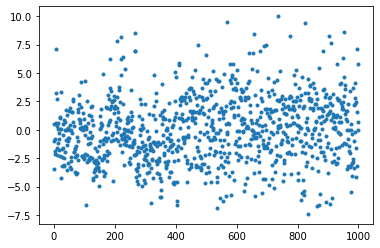

In [16]:
plt.plot(X[0],'.') #scatter plot of data 

In [17]:
X[0]

array([ 4.82131183e-01, -9.54920411e-01, -3.41147375e+00, -1.90405989e+00,
       -2.09333706e+00, -8.27779233e-01,  5.66309750e-01,  3.24233580e+00,
        7.13692808e+00, -2.22420120e+00, -1.56215668e+00,  2.98113823e-01,
        2.66739297e+00, -1.14676356e+00,  6.29681885e-01,  9.33921933e-02,
       -2.51831055e-01, -7.97125340e-01, -1.81246233e+00,  7.46151209e-02,
       -2.26850080e+00,  1.13374770e+00,  1.00957489e+00,  1.06693983e-01,
        3.29629469e+00, -4.23634481e+00, -3.20955753e+00, -1.69606054e+00,
       -2.42807627e+00,  4.90968168e-01, -4.65731442e-01, -1.63979673e+00,
        8.99964035e-01, -2.48739004e+00, -3.06615734e+00, -3.18502426e+00,
        6.59206867e-01,  2.06530690e-02, -1.98926437e+00,  1.76982427e+00,
       -5.63862920e-02, -8.78732145e-01, -3.52907562e+00,  1.34185779e+00,
       -1.37517023e+00,  1.68625057e-01, -7.27261066e-01, -2.94247746e+00,
       -9.45335686e-01,  4.05454636e-03,  1.60923815e+00, -7.63411641e-01,
        3.89447331e-01, -

In [18]:
np.argmax(X[0])

735

In [19]:
labels[948] #984th label in data set

'Granny Smith'

In [20]:
top_ten = np.argsort(X[0])[::-1][0:10] #finds top 10 values in array 

In [21]:
for i in top_ten: #top 10 labels 
    print(labels[i])

poncho
fur coat
stole
pineapple, ananas
miniature poodle
mitten
wig
sarong
Irish water spaniel
curly-coated retriever


In [22]:
labels #all labels in data set 

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([ 21.,  48., 170., 215., 226., 192.,  79.,  26.,  16.,   7.]),
 array([-7.4101443 , -5.6693573 , -3.9285703 , -2.187783  , -0.44699603,
         1.293791  ,  3.034578  ,  4.7753654 ,  6.5161524 ,  8.256939  ,
         9.997726  ], dtype=float32),
 <a list of 10 Patch objects>)

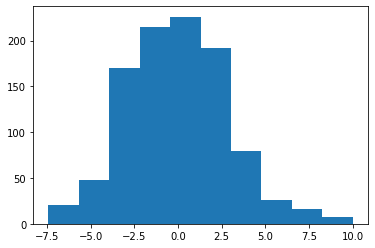

In [23]:
plt.hist(X[0]) #plots a histogram of the data 

In [24]:
X = GPU_data(X)
Y = GPU_data(Y)

In [25]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
  s = s1 / s1.sum(1)[:,None] #applies softmax function to data- re-scale them so that the elements lie in the range [0, 1] and equal 1
    return s

In [26]:
def cross_entropy(outputs, labels):            #?????
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [27]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma) #
    return R.rvs(s)

In [28]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2) #a sequence of integers defining the shape of the output tensor.
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2) # Returns a new tensor with the square-root of the elements of input 

    return z

In [29]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0] #Returns the sum of all elements in the input tensor.

In [30]:
X.shape

torch.Size([50, 1000])

In [31]:
def get_batch(mode):
    b = c.b
    if mode == "train": #train set
        r = np.random.randint(X.shape[0]-b) #return random integers from the values specified with low (inclusive) to high (exclusive) param
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test": #test set
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [32]:
def model(x,w):

    return x@w[0]

In [33]:
def make_plots():
    
    acc_train = acc(model(x,w),y) #generate plots for the results of applied loss functions and/or. accuracy of models trained with machine learning methods
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train}) #weights and biases 

In [34]:
wb.init(project="Linear_Model_Photo_1"); #calculates loss
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


<ipython-input-2-4608b466ff03>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


https://tensorspace.org/

In [ ]:
best- 0.9997
worst- 0.9996
average- 0.9996 